## Building A Deep CNN Image Classifier

### 1. Setup and Load Data

#### 1.1 Install Dependencies and Setup

In [1]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib tensorboard

In [2]:
import tensorflow as tf
import os

2025-07-18 08:26:10.319825: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

#### 1.2 Look at images

In [13]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [5]:
data_dir = 'data'

In [6]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir):
    print(image_class)

not_pizza
pizza


In [10]:
img = cv2.imread(os.path.join('data', 'pizza', '5764.jpg'))
img

array([[[106, 110,  91],
        [ 68,  70,  51],
        [ 56,  56,  40],
        ...,
        [ 97,  83,  87],
        [ 97,  83,  89],
        [ 95,  81,  87]],

       [[ 98, 104,  87],
        [ 97, 100,  84],
        [ 52,  51,  37],
        ...,
        [ 97,  84,  86],
        [ 97,  83,  87],
        [ 95,  81,  85]],

       [[ 86,  91,  76],
        [130, 132, 120],
        [ 51,  51,  39],
        ...,
        [ 99,  87,  87],
        [ 99,  87,  87],
        [ 97,  85,  85]],

       ...,

       [[ 71,  63,  64],
        [ 71,  63,  64],
        [ 72,  64,  65],
        ...,
        [ 13,  12,   8],
        [ 13,  12,   8],
        [ 13,  12,   8]],

       [[ 74,  66,  67],
        [ 74,  66,  67],
        [ 74,  66,  67],
        ...,
        [ 13,  12,   8],
        [ 12,  11,   7],
        [ 12,  11,   7]],

       [[ 72,  64,  65],
        [ 72,  64,  65],
        [ 74,  66,  67],
        ...,
        [ 12,  11,   7],
        [ 10,   9,   5],
        [  9,   8,   4]]

In [12]:
type(img), img.shape

(numpy.ndarray, (384, 512, 3))

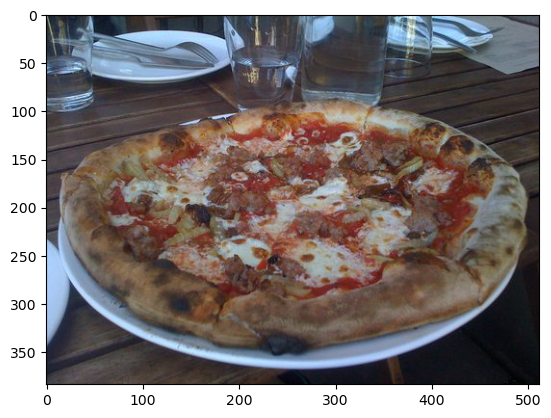

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

#### 1.3 Load Data

In [18]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [23]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1966 files belonging to 2 classes.


2025-07-18 09:43:25.412646: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [24]:
data_iterator = data.as_numpy_iterator()

2025-07-18 09:45:25.209595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1966]
	 [[{{node Placeholder/_4}}]]
2025-07-18 09:45:25.210509: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1966]
	 [[{{node Placeholder/_0}}]]


In [32]:
# Get another batch from the iterator
batch = data_iterator.next()

In [33]:
batch

(array([[[[ 38.25 ,  15.   ,   6.5  ],
          [ 51.   ,  24.75 ,  14.75 ],
          [ 47.625,  17.125,   6.875],
          ...,
          [ 70.5  ,  39.25 ,  12.75 ],
          [ 75.375,  44.125,  11.375],
          [ 70.875,  38.875,   3.875]],
 
         [[ 43.875,  21.625,  10.5  ],
          [ 39.75 ,  13.75 ,   3.   ],
          [ 50.125,  20.375,   9.125],
          ...,
          [ 64.625,  33.375,   7.   ],
          [ 70.125,  39.375,   6.625],
          [ 71.25 ,  42.   ,   2.5  ]],
 
         [[ 35.75 ,  16.375,   2.875],
          [ 42.875,  19.   ,   6.25 ],
          [ 48.   ,  20.125,   7.375],
          ...,
          [ 67.   ,  37.75 ,   7.625],
          [ 79.125,  50.375,  16.   ],
          [ 75.375,  47.375,   9.25 ]],
 
         ...,
 
         [[ 13.375,   4.625,   3.125],
          [ 11.875,   3.125,   1.625],
          [ 10.125,   2.625,   1.25 ],
          ...,
          [164.875, 168.125, 183.   ],
          [164.25 , 167.375, 186.25 ],
          [164.625

In [34]:
len(batch)

2

In [35]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [36]:
# Class 1 = Pizza 
# Class 0 = Not Pizza
batch[1]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int32)

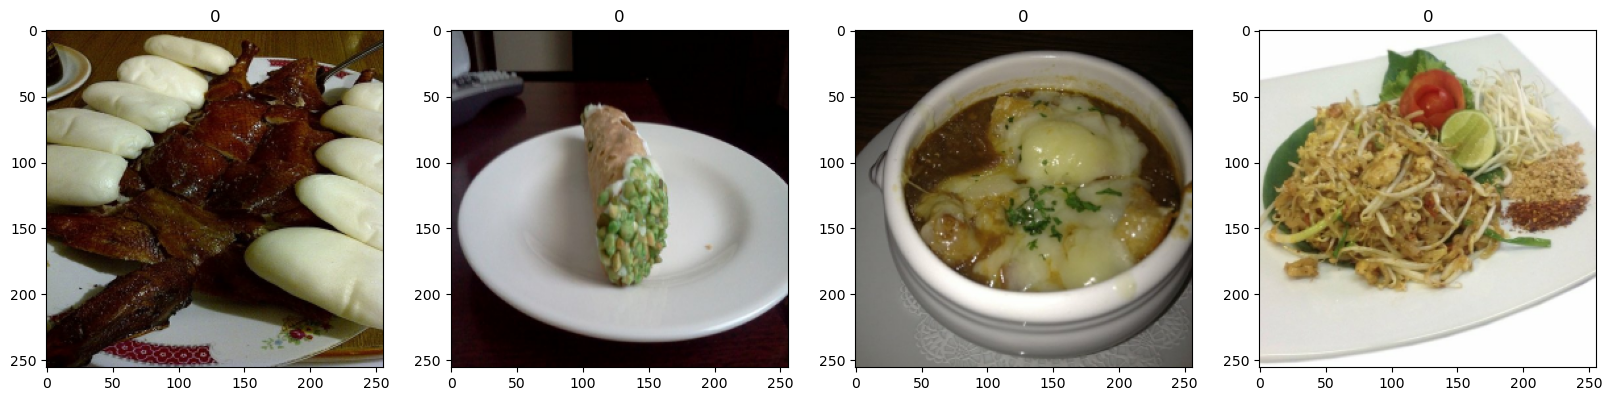

In [37]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### 2. Preprocess Data

#### 2.1 Scale Data

In [38]:
batch[0]  # images

array([[[[ 38.25 ,  15.   ,   6.5  ],
         [ 51.   ,  24.75 ,  14.75 ],
         [ 47.625,  17.125,   6.875],
         ...,
         [ 70.5  ,  39.25 ,  12.75 ],
         [ 75.375,  44.125,  11.375],
         [ 70.875,  38.875,   3.875]],

        [[ 43.875,  21.625,  10.5  ],
         [ 39.75 ,  13.75 ,   3.   ],
         [ 50.125,  20.375,   9.125],
         ...,
         [ 64.625,  33.375,   7.   ],
         [ 70.125,  39.375,   6.625],
         [ 71.25 ,  42.   ,   2.5  ]],

        [[ 35.75 ,  16.375,   2.875],
         [ 42.875,  19.   ,   6.25 ],
         [ 48.   ,  20.125,   7.375],
         ...,
         [ 67.   ,  37.75 ,   7.625],
         [ 79.125,  50.375,  16.   ],
         [ 75.375,  47.375,   9.25 ]],

        ...,

        [[ 13.375,   4.625,   3.125],
         [ 11.875,   3.125,   1.625],
         [ 10.125,   2.625,   1.25 ],
         ...,
         [164.875, 168.125, 183.   ],
         [164.25 , 167.375, 186.25 ],
         [164.625, 169.25 , 191.125]],

        [[

In [39]:
batch[1]  # labels

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int32)

In [40]:
batch[0].shape

(32, 256, 256, 3)

In [43]:
batch[0].min(), batch[0].max()

(0.0, 255.0)

In [41]:
scaled = batch[0] / 255

In [44]:
scaled.min(), scaled.max()

(0.0, 1.0)

In [45]:
data = data.map(lambda x, y: (x/255, y))

In [46]:
data.as_numpy_iterator().next()

2025-07-18 10:50:48.290145: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1966]
	 [[{{node Placeholder/_0}}]]
2025-07-18 10:50:48.292508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1966]
	 [[{{node Placeholder/_4}}]]


(array([[[[0.1392157 , 0.06078431, 0.03333334],
          [0.12941177, 0.05490196, 0.03137255],
          [0.13039216, 0.05588235, 0.04019608],
          ...,
          [0.0254902 , 0.01764706, 0.02941176],
          [0.02843137, 0.02058824, 0.03235294],
          [0.03039216, 0.02254902, 0.03431373]],
 
         [[0.14117648, 0.06666667, 0.03921569],
          [0.14019608, 0.06568628, 0.04215686],
          [0.13235295, 0.05784314, 0.04215686],
          ...,
          [0.03627451, 0.02843137, 0.04019608],
          [0.0254902 , 0.01764706, 0.02941176],
          [0.03137255, 0.02352941, 0.03529412]],
 
         [[0.13627452, 0.06176471, 0.03431373],
          [0.12352941, 0.04901961, 0.0254902 ],
          [0.12058824, 0.04607843, 0.03039216],
          ...,
          [0.02941176, 0.02156863, 0.03333334],
          [0.03039216, 0.02254902, 0.03431373],
          [0.03627451, 0.02843137, 0.04019608]],
 
         ...,
 
         [[0.5882353 , 0.4627451 , 0.3127451 ],
          [0.58039

In [48]:
scaled_iterator = data.as_numpy_iterator()

In [49]:
scaled_iterator.next()

(array([[[[0.35      , 0.29803923, 0.25588235],
          [0.45686275, 0.39215687, 0.40588236],
          [0.5264706 , 0.45588234, 0.52254903],
          ...,
          [0.61764705, 0.527451  , 0.45686275],
          [0.6284314 , 0.5441176 , 0.46666667],
          [0.63529414, 0.5509804 , 0.4735294 ]],
 
         [[0.26960784, 0.19901961, 0.17254902],
          [0.36764705, 0.29313725, 0.2882353 ],
          [0.44509804, 0.36960784, 0.39803922],
          ...,
          [0.60294116, 0.5009804 , 0.44215685],
          [0.6127451 , 0.5117647 , 0.45686275],
          [0.62352943, 0.52254903, 0.46764705]],
 
         [[0.26764706, 0.17941177, 0.16568628],
          [0.43823528, 0.3529412 , 0.32156864],
          [0.4480392 , 0.3617647 , 0.33137256],
          ...,
          [0.6107843 , 0.4970588 , 0.45196077],
          [0.6009804 , 0.4852941 , 0.44509804],
          [0.59607846, 0.48039216, 0.44019607]],
 
         ...,
 
         [[0.62941176, 0.50784314, 0.39117646],
          [0.61470

In [51]:
scaled_iterator.next()[0].max(), scaled_iterator.next()[0].min()

(1.0, 0.0)

#### 2.2 Split Data

In [55]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) +1 

In [56]:
len(data)

62

In [57]:
train_size, val_size, test_size

(43, 12, 7)

In [58]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [59]:
len(train), len(val), len(test)

(43, 12, 7)

### 3. Deep Model

#### 3.1 Build Deep Learning Model

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [70]:
model = Sequential()

In [71]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 16)      

In [73]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

#### 3.2 Train

In [74]:
logdir = 'logs'

In [80]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [81]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2025-07-18 12:47:55.287074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1966]
	 [[{{node Placeholder/_4}}]]
2025-07-18 12:47:55.293279: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1966]
	 [[{{node Placeholder/_4}}]]


43/43 [==============================] - ETA: 0s - loss: 0.7082 - accuracy: 0.5901  

2025-07-18 12:48:45.260937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1966]
	 [[{{node Placeholder/_4}}]]
2025-07-18 12:48:45.262412: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1966]
	 [[{{node Placeholder/_4}}]]


43/43 [==============================] - 57s 1s/step - loss: 0.7082 - accuracy: 0.5901 - val_loss: 0.6064 - val_accuracy: 0.6979
Epoch 2/20
43/43 [==============================] - 51s 1s/step - loss: 0.5895 - accuracy: 0.6890 - val_loss: 0.5096 - val_accuracy: 0.7656
Epoch 3/20
43/43 [==============================] - 49s 1s/step - loss: 0.5122 - accuracy: 0.7485 - val_loss: 0.4898 - val_accuracy: 0.8073
Epoch 4/20
43/43 [==============================] - 55s 1s/step - loss: 0.4816 - accuracy: 0.7769 - val_loss: 0.4843 - val_accuracy: 0.7839
Epoch 5/20
43/43 [==============================] - 56s 1s/step - loss: 0.4029 - accuracy: 0.8198 - val_loss: 0.4472 - val_accuracy: 0.8177
Epoch 6/20
43/43 [==============================] - 54s 1s/step - loss: 0.3296 - accuracy: 0.8605 - val_loss: 0.5152 - val_accuracy: 0.7839
Epoch 7/20
43/43 [==============================] - 64s 1s/step - loss: 0.2422 - accuracy: 0.8990 - val_loss: 0.5732 - val_accuracy: 0.7682
Epoch 8/20
43/43 [=============

In [82]:
hist.history

{'loss': [0.7081732153892517,
  0.5895121097564697,
  0.5121912360191345,
  0.4816073477268219,
  0.40291476249694824,
  0.3295583724975586,
  0.2421766072511673,
  0.24209780991077423,
  0.14779776334762573,
  0.10159450024366379,
  0.11608946323394775,
  0.04029140993952751,
  0.020586179569363594,
  0.011704820208251476,
  0.011174041777849197,
  0.015626372769474983,
  0.006111024413257837,
  0.004766097757965326,
  0.00523705268278718,
  0.01420485321432352],
 'accuracy': [0.5901162624359131,
  0.6889534592628479,
  0.7485465407371521,
  0.7768895626068115,
  0.819767415523529,
  0.8604651093482971,
  0.898982584476471,
  0.9004360437393188,
  0.9454941749572754,
  0.9694767594337463,
  0.9542151093482971,
  0.9905523061752319,
  0.9963662624359131,
  0.9978197813034058,
  0.9985465407371521,
  0.9970930218696594,
  0.9992732405662537,
  0.9985465407371521,
  0.9992732405662537,
  0.9978197813034058],
 'val_loss': [0.6063716411590576,
  0.509628176689148,
  0.4898301661014557,
  0

#### 3.3 Plot Performance

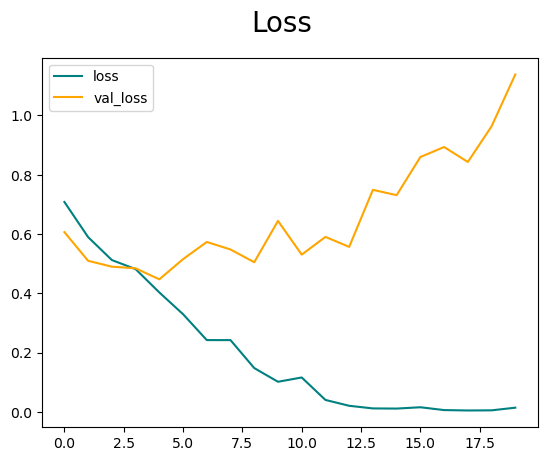

In [83]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

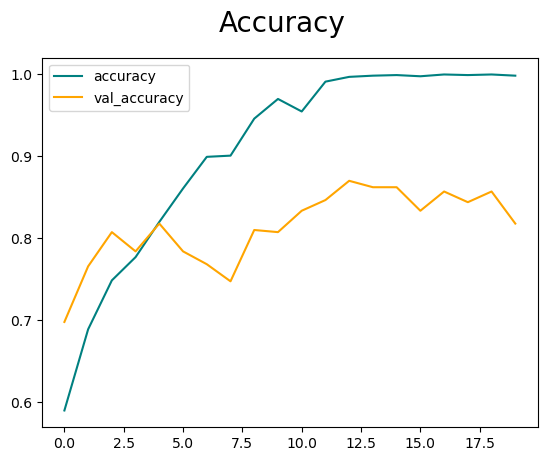

In [84]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc='upper left')
plt.show()

### Evaluate Performance

#### 4.1 Evaluate

In [85]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [86]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [87]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2025-07-18 13:31:34.454570: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1966]
	 [[{{node Placeholder/_4}}]]
2025-07-18 13:31:34.455268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1966]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 434ms/step


In [90]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.8452380895614624, Recall: 0.6339285969734192, Accuracy: 0.737864077091217


#### 4.2 Test

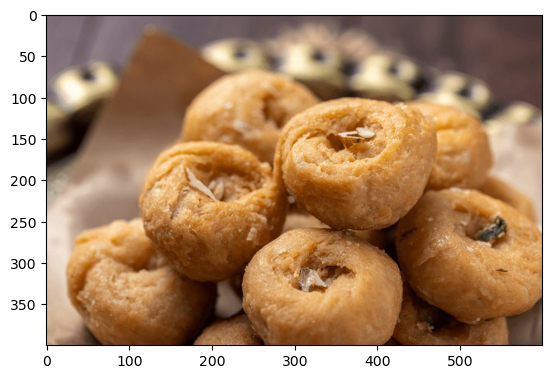

In [105]:
img = cv2.imread('non-pizza-example.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

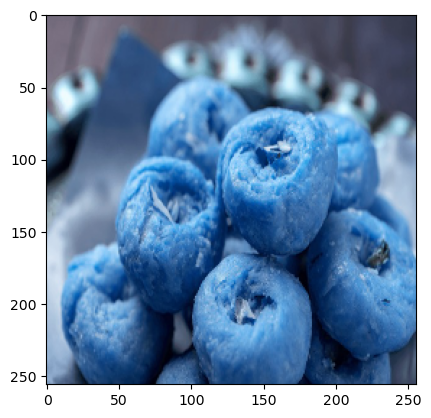

In [106]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [107]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 92ms/step


In [108]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [109]:
yhat

array([[0.05277199]], dtype=float32)

In [110]:
if yhat > 0.5:
    print("Predicted class is Pizza")
else:
    print("Predicted class is Non-Pizza")

Predicted class is Non-Pizza


### 5. Save the Model

#### 5.1 Save the Model

In [111]:
from tensorflow.keras.models import load_model

In [112]:
model.save(os.path.join('models', 'binarypizzaimageclassifier.h5'))

In [113]:
new_model = load_model(os.path.join('models', 'binarypizzaimageclassifier.h5'))

In [114]:
new_model

In [116]:
yhat_new = new_model.predict(np.expand_dims(resize/255, axis=0))

1/1 [==============================] - 0s 90ms/step


In [117]:
if yhat_new > 0.5:
    print("Predicted class is Pizza")
else:
    print("Predicted class is Non-pizza")

Predicted class is Non-pizza
